<a href="https://colab.research.google.com/github/zhangyingchengqi/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter01/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 基于梯度下降的更新权重的求解方法:

import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
x = np.array([[1,1]]) #
y = np.array([[0]])

In [3]:
from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    hidden = 1/(1+np.exp(-pre_hidden))
    out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [4]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

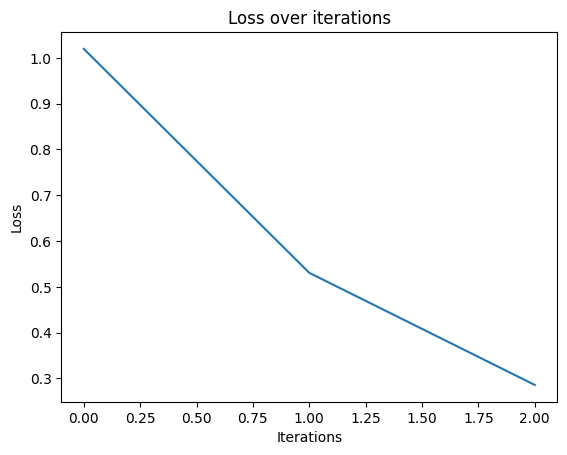

In [8]:
# initialize weights
weights = [
    np.array([[0.1, 0.2, 0.3],       # 权重 W1：输入层 → 隐藏层
              [0.4, 0.5, 0.6]]),     # shape: (2, 3)
    np.array([[0]]),                # 偏置 b1：shape: (1,)
    np.array([[0.4],                # 权重 W2：隐藏层 → 输出层
              [0.5],
              [0.6]]),              # shape: (3, 1)
    np.array([[0]])                 # 偏置 b2：shape: (1,)
]

losses = []
lr = 0.1
for i in range(3):
    weights, loss = update_weights(x, y, weights, lr)
    losses.append(loss)

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over iterations")
plt.show()